# [Go here for just the analysis of 2025](https://sprintup.github.io/python-practice/)

In [8]:
# %%
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv("bix7_2025_results.csv")

# Convert time strings (MM:SS or H:MM:SS) to total seconds
def time_to_seconds(t):
    try:
        parts = list(map(int, t.strip().split(":")))
        if len(parts) == 2:
            minutes, seconds = parts
            return minutes * 60 + seconds
        elif len(parts) == 3:
            hours, minutes, seconds = parts
            return hours * 3600 + minutes * 60 + seconds
    except:
        return None

# Convert seconds to h:mm:ss
def seconds_to_hms(seconds):
    seconds = int(round(seconds))
    h = seconds // 3600
    m = (seconds % 3600) // 60
    s = seconds % 60
    return f"{h}:{m:02}:{s:02}"

# Convert seconds to h:mm:ss or m:ss
def seconds_to_time(seconds):
    seconds = int(seconds)
    h = seconds // 3600
    m = (seconds % 3600) // 60
    s = seconds % 60
    return f"{h}:{m:02}:{s:02}" if h > 0 else f"{m}:{s:02}"

# Apply conversions
df["Pace_sec"] = df["Pace"].apply(time_to_seconds)
df["Finish_sec"] = df["Finish Time"].apply(time_to_seconds)
df_clean = df.dropna(subset=["Pace_sec", "Finish_sec"])

# Extract gender and age group
df_clean["Gender"] = df_clean["Age"].str.strip().str[0]
age_valid = df_clean["Age"].str.match(r"^[MF] \d+$")
df_age_filtered = df_clean[age_valid].copy()
df_age_filtered["AgeGroup"] = df_age_filtered["Age"].str.extract(r'([MF]) (\d+)').apply(
    lambda x: f"{x[0]}{int(x[1])//5*5}-{int(x[1])//5*5+4}", axis=1
)

# Filter for M35-39 and F35-39
df_m35_39 = df_age_filtered[df_age_filtered["AgeGroup"] == "M35-39"]
df_f35_39 = df_age_filtered[df_age_filtered["AgeGroup"] == "F35-39"]

C:\Users\Work\AppData\Local\Temp\ipykernel_56944\280240096.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Gender"] = df_clean["Age"].str.strip().str[0]


In [9]:
# Function to print descriptive stats
def print_stats(group_df, label):
    print(f"\n📊 Descriptive Statistics for {label}")
    pace_stats = group_df["Pace_sec"].describe()
    finish_stats = group_df["Finish_sec"].describe()

    print("Pace (min:sec per mile):")
    for stat in ["count", "mean", "std", "min", "25%", "50%", "75%", "max"]:
        value = pace_stats[stat]
        print(f"  {stat.capitalize()}: {int(value) if stat == 'count' else seconds_to_time(value)}")

    print("Finish Time (h:mm:ss):")
    for stat in ["count", "mean", "std", "min", "25%", "50%", "75%", "max"]:
        value = finish_stats[stat]
        print(f"  {stat.capitalize()}: {int(value) if stat == 'count' else seconds_to_hms(value)}")

# Display stats
print_stats(df_m35_39, "M35-39")
print_stats(df_f35_39, "F35-39")



📊 Descriptive Statistics for M35-39
Pace (min:sec per mile):
  Count: 434
  Mean: 9:57
  Std: 2:41
  Min: 4:40
  25%: 8:08
  50%: 9:29
  75%: 11:07
  Max: 22:31
Finish Time (h:mm:ss):
  Count: 434
  Mean: 1:09:42
  Std: 0:18:51
  Min: 0:32:43
  25%: 0:56:54
  50%: 1:06:23
  75%: 1:17:54
  Max: 2:37:39

📊 Descriptive Statistics for F35-39
Pace (min:sec per mile):
  Count: 401
  Mean: 11:40
  Std: 2:47
  Min: 6:02
  25%: 9:47
  50%: 11:11
  75%: 13:11
  Max: 19:48
Finish Time (h:mm:ss):
  Count: 401
  Mean: 1:21:47
  Std: 0:19:33
  Min: 0:42:13
  25%: 1:08:29
  50%: 1:18:14
  75%: 1:32:19
  Max: 2:18:36


In [10]:
# Percentage under 50 minutes
under_50_count = (df_clean["Finish_sec"] < 3000).sum()
total_count = len(df_clean)
percentage_under_50 = (under_50_count / total_count) * 100
print(f"\n📊 Percentage of runners who finished under 50 minutes: {percentage_under_50:.2f}%")



📊 Percentage of runners who finished under 50 minutes: 8.60%


C:\Users\Work\AppData\Local\Temp\ipykernel_56944\2564806696.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels([seconds_to_time(x) for x in xticks])
C:\Users\Work\AppData\Local\Temp\ipykernel_56944\2564806696.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels([seconds_to_time(x) for x in xticks])
C:\Users\Work\AppData\Local\Temp\ipykernel_56944\2564806696.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels([seconds_to_time(x) for x in xticks])
C:\Users\Work\AppData\Local\Temp\ipykernel_56944\2564806696.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xt

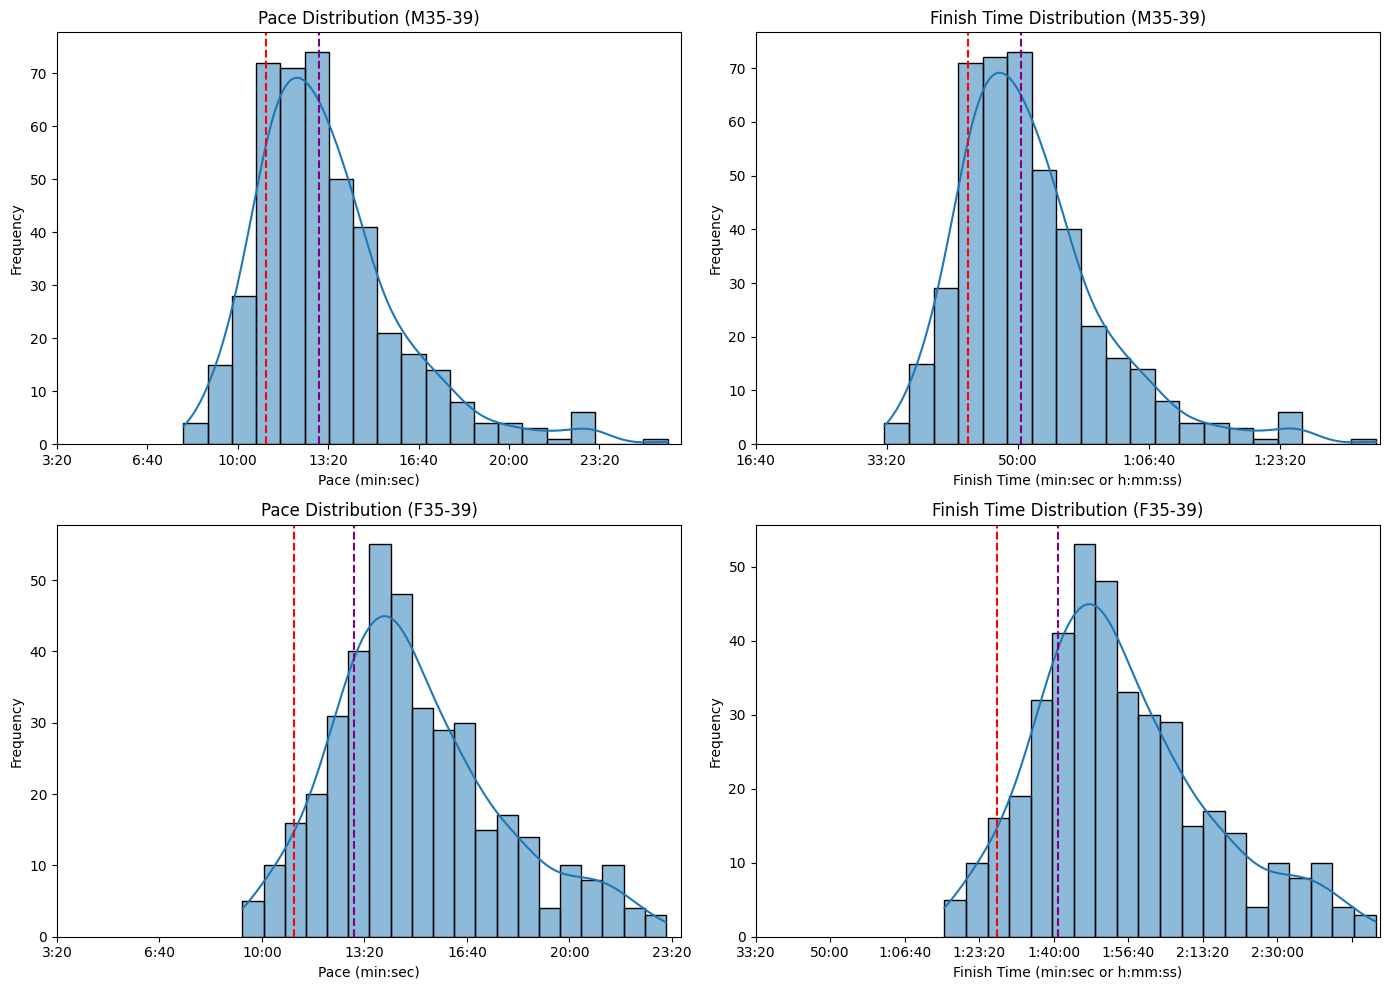

In [17]:
# Reference lines
red_pace = 7 * 60 + 43
purple_pace = 9 * 60 + 39
red_finish = 54 * 60
purple_finish = 1 * 3600 + 7 * 60 + 33

# Function to convert seconds to h:mm:ss or m:ss
def seconds_to_time(seconds):
    seconds = int(seconds)
    h = seconds // 3600
    m = (seconds % 3600) // 60
    s = seconds % 60
    return f"{h}:{m:02}:{s:02}" if h > 0 else f"{m}:{s:02}"

# Plot histograms for M35-39 and F35-39
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# M35-39 Pace
sns.histplot(df_m35_39["Pace_sec"], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].axvline(red_pace, color='red', linestyle='--', label='7:43')
axes[0, 0].axvline(purple_pace, color='purple', linestyle='--', label='9:39')
axes[0, 0].set_title("Pace Distribution (M35-39)")
axes[0, 0].set_xlabel("Pace (min:sec)")
axes[0, 0].set_ylabel("Frequency")
xticks = axes[0, 0].get_xticks()
axes[0, 0].set_xticklabels([seconds_to_time(x) for x in xticks])
axes[0, 0].set_xlim(0, df_m35_39["Pace_sec"].max() + 30)

# M35-39 Finish Time
sns.histplot(df_m35_39["Finish_sec"], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].axvline(red_finish, color='red', linestyle='--', label='54:00')
axes[0, 1].axvline(purple_finish, color='purple', linestyle='--', label='1:07:33')
axes[0, 1].set_title("Finish Time Distribution (M35-39)")
axes[0, 1].set_xlabel("Finish Time (min:sec or h:mm:ss)")
axes[0, 1].set_ylabel("Frequency")
xticks = axes[0, 1].get_xticks()
axes[0, 1].set_xticklabels([seconds_to_time(x) for x in xticks])
axes[0, 1].set_xlim(0, df_m35_39["Finish_sec"].max() + 60)

# F35-39 Pace
sns.histplot(df_f35_39["Pace_sec"], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].axvline(red_pace, color='red', linestyle='--', label='7:43')
axes[1, 0].axvline(purple_pace, color='purple', linestyle='--', label='9:39')
axes[1, 0].set_title("Pace Distribution (F35-39)")
axes[1, 0].set_xlabel("Pace (min:sec)")
axes[1, 0].set_ylabel("Frequency")
xticks = axes[1, 0].get_xticks()
axes[1, 0].set_xticklabels([seconds_to_time(x) for x in xticks])
axes[1, 0].set_xlim(0, df_f35_39["Pace_sec"].max() + 30)

# F35-39 Finish Time
sns.histplot(df_f35_39["Finish_sec"], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].axvline(red_finish, color='red', linestyle='--', label='54:00')
axes[1, 1].axvline(purple_finish, color='purple', linestyle='--', label='1:07:33')
axes[1, 1].set_title("Finish Time Distribution (F35-39)")
axes[1, 1].set_xlabel("Finish Time (min:sec or h:mm:ss)")
axes[1, 1].set_ylabel("Frequency")
xticks = axes[1, 1].get_xticks()
axes[1, 1].set_xticklabels([seconds_to_time(x) for x in xticks])
axes[1, 1].set_xlim(0, df_f35_39["Finish_sec"].max() + 60)

plt.tight_layout()
plt.show()


In [12]:
# Overall descriptive statistics
pace_stats = df_clean["Pace_sec"].describe()
finish_stats = df_clean["Finish_sec"].describe()

print("📊 Descriptive Statistics for All Runners")
print("Pace (min:sec per mile):")
for stat in ["count", "mean", "std", "min", "25%", "50%", "75%", "max"]:
    value = pace_stats[stat]
    print(f"  {stat.capitalize()}: {int(value) if stat == 'count' else seconds_to_time(value)}")

print("Finish Time (h:mm:ss):")
for stat in ["count", "mean", "std", "min", "25%", "50%", "75%", "max"]:
    value = finish_stats[stat]
    print(f"  {stat.capitalize()}: {int(value) if stat == 'count' else seconds_to_hms(value)}")


📊 Descriptive Statistics for All Runners
Pace (min:sec per mile):
  Count: 7852
  Mean: 11:04
  Std: 3:13
  Min: 4:31
  25%: 8:48
  50%: 10:36
  75%: 12:45
  Max: 31:10
Finish Time (h:mm:ss):
  Count: 7852
  Mean: 1:17:34
  Std: 0:22:36
  Min: 0:31:40
  25%: 1:01:35
  50%: 1:14:10
  75%: 1:29:17
  Max: 3:38:12


In [13]:
# Descriptive statistics by gender
for gender in ["M", "F"]:
    gender_df = df_clean[df_clean["Gender"] == gender]
    pace_stats = gender_df["Pace_sec"].describe()
    finish_stats = gender_df["Finish_sec"].describe()

    print(f"\n📊 Descriptive Statistics for {gender} Runners")
    print("Pace (min:sec per mile):")
    for stat in ["count", "mean", "std", "min", "25%", "50%", "75%", "max"]:
        value = pace_stats[stat]
        print(f"  {stat.capitalize()}: {int(value) if stat == 'count' else seconds_to_time(value)}")

    print("Finish Time (h:mm:ss):")
    for stat in ["count", "mean", "std", "min", "25%", "50%", "75%", "max"]:
        value = finish_stats[stat]
        print(f"  {stat.capitalize()}: {int(value) if stat == 'count' else seconds_to_hms(value)}")



📊 Descriptive Statistics for M Runners
Pace (min:sec per mile):
  Count: 4291
  Mean: 10:14
  Std: 3:04
  Min: 4:31
  25%: 8:09
  50%: 9:43
  75%: 11:42
  Max: 31:10
Finish Time (h:mm:ss):
  Count: 4291
  Mean: 1:11:40
  Std: 0:21:30
  Min: 0:31:40
  25%: 0:57:08
  50%: 1:08:04
  75%: 1:21:52
  Max: 3:38:12

📊 Descriptive Statistics for F Runners
Pace (min:sec per mile):
  Count: 3561
  Mean: 12:05
  Std: 3:07
  Min: 4:35
  25%: 9:50
  50%: 11:37
  75%: 13:54
  Max: 22:19
Finish Time (h:mm:ss):
  Count: 3561
  Mean: 1:24:40
  Std: 0:21:49
  Min: 0:32:05
  25%: 1:08:53
  50%: 1:21:20
  75%: 1:37:17
  Max: 2:36:10


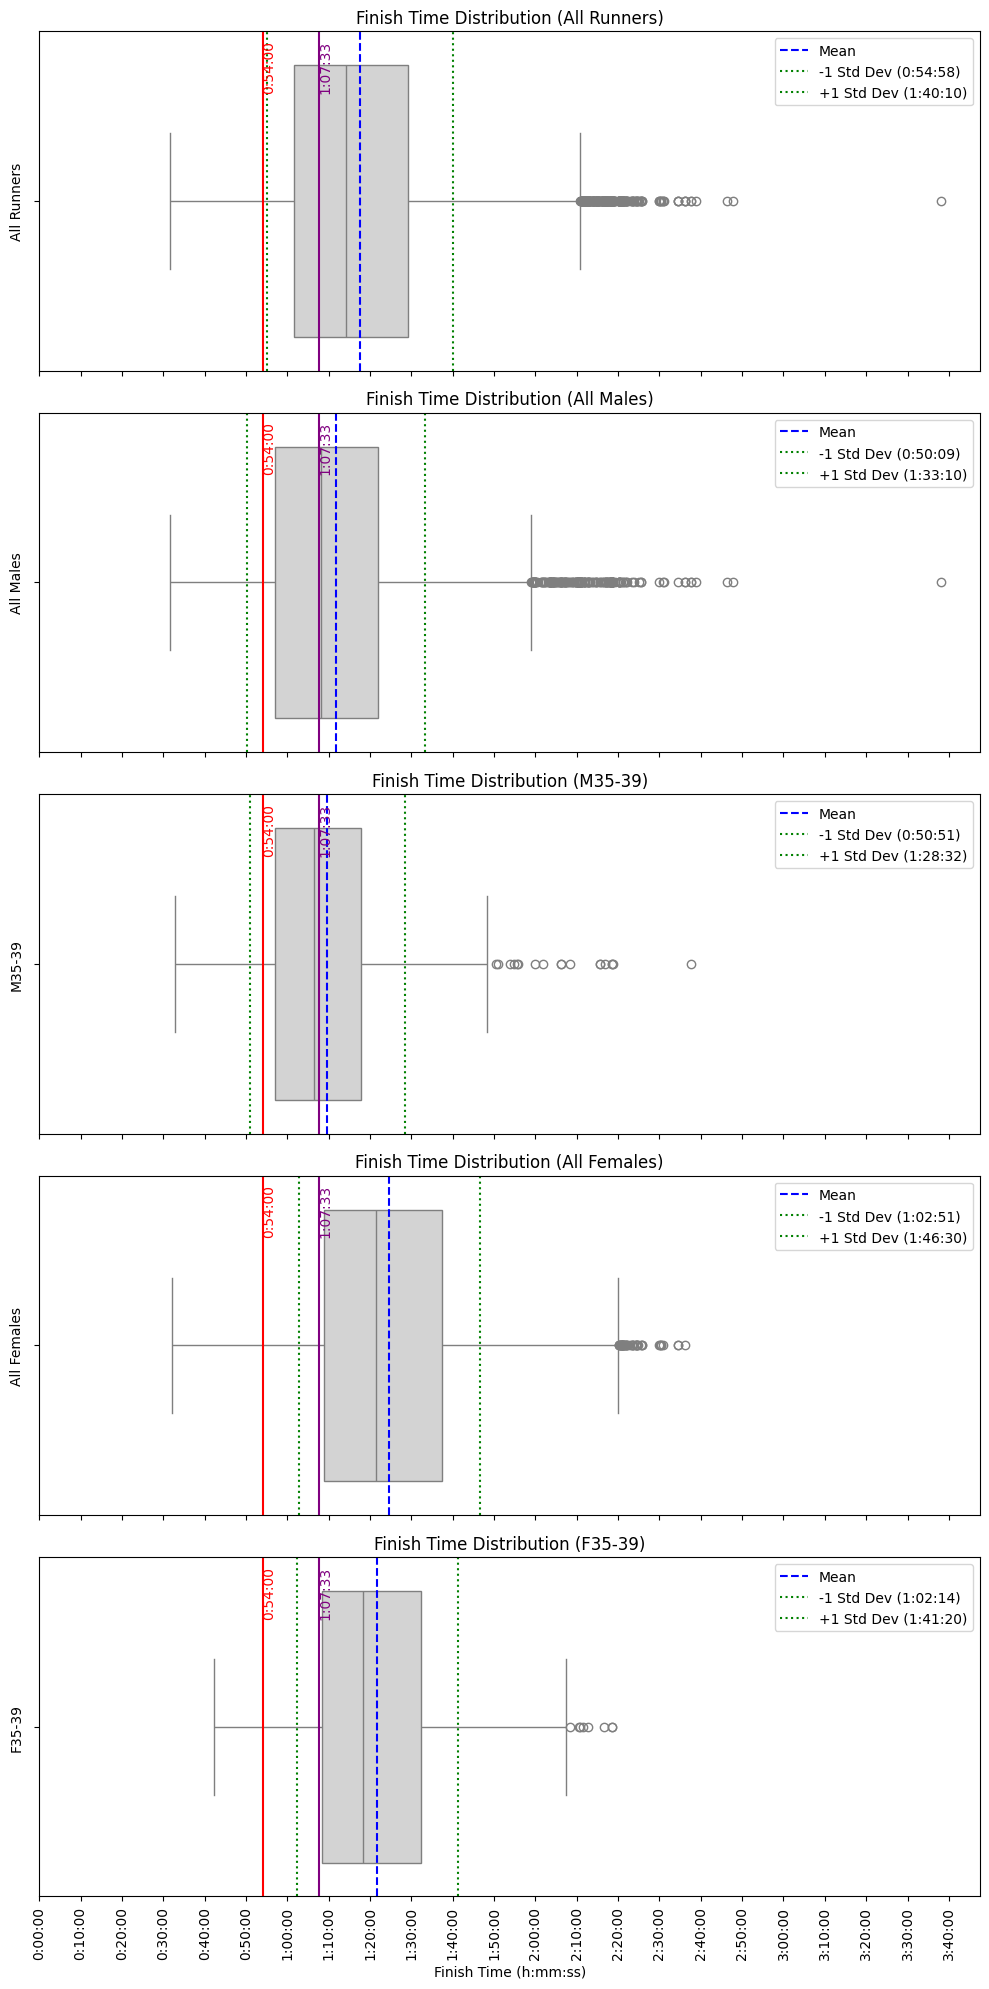

In [16]:
# Recreate df_age_filtered and age groups if not already defined
age_valid = df_clean["Age"].str.match(r"^[MF] \d+$")
df_age_filtered = df_clean[age_valid].copy()
df_age_filtered["Gender"] = df_age_filtered["Age"].str.strip().str[0]
df_age_filtered["AgeGroup"] = df_age_filtered["Age"].str.extract(r'([MF]) (\d+)').apply(
    lambda x: f"{x[0]}{int(x[1])//5*5}-{int(x[1])//5*5+4}", axis=1
)

# Define group subsets
df_male = df_age_filtered[df_age_filtered["Gender"] == "M"]
df_female = df_age_filtered[df_age_filtered["Gender"] == "F"]
df_m35_39 = df_age_filtered[df_age_filtered["AgeGroup"] == "M35-39"]
df_f35_39 = df_age_filtered[df_age_filtered["AgeGroup"] == "F35-39"]

# Boxplots for All Runners, All Males, M35-39, All Females, F35-39
groups = [
    ("All Runners", df_clean),
    ("All Males", df_male),
    ("M35-39", df_m35_39),
    ("All Females", df_female),
    ("F35-39", df_f35_39),
]

# Reference lines
red_line = 54 * 60
purple_line = 1 * 3600 + 7 * 60 + 33

# X-axis ticks
all_finish_times = pd.concat([df["Finish_sec"] for _, df in groups])
x_min = 0
x_max = int(all_finish_times.max()) + 600
xtick_positions = list(range(x_min, x_max + 1, 600))
xtick_labels = [seconds_to_hms(x) for x in xtick_positions]

# Create vertically stacked box plots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 20), sharex=True)

for ax, (label, df_group) in zip(axes, groups):
    mean_val = df_group["Finish_sec"].mean()
    std_val = df_group["Finish_sec"].std()

    sns.boxplot(x=df_group["Finish_sec"], ax=ax, color="lightgray")
    ax.axvline(mean_val, color='blue', linestyle='--', label='Mean')
    ax.axvline(mean_val - std_val, color='green', linestyle=':', label=f"-1 Std Dev ({seconds_to_hms(mean_val - std_val)})")
    ax.axvline(mean_val + std_val, color='green', linestyle=':', label=f"+1 Std Dev ({seconds_to_hms(mean_val + std_val)})")

    ax.axvline(red_line, color='red', linestyle='-')
    ax.text(red_line, ax.get_ylim()[1]*0.95, seconds_to_hms(red_line), color='red', rotation=90, verticalalignment='top')

    ax.axvline(purple_line, color='purple', linestyle='-')
    ax.text(purple_line, ax.get_ylim()[1]*0.95, seconds_to_hms(purple_line), color='purple', rotation=90, verticalalignment='top')

    ax.set_title(f"Finish Time Distribution ({label})")
    ax.set_ylabel(label)
    ax.legend()
    ax.set_xticks(xtick_positions)
    ax.set_xticklabels(xtick_labels, rotation=90)

axes[-1].set_xlabel("Finish Time (h:mm:ss)")
plt.tight_layout()
plt.show()
